In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import readsav
from scipy.interpolate import interp1d
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from matplotlib import gridspec

import sys
sys.path.append("../")
from create_spec import create_spec
from fit2gauss import fit2gauss

In [2]:
# import arrays
tube = readsav('/Users/WilliamHenryAshfieldIV/dat/f4_vis5.sav',verbose=False,python_dict=False)
frac = readsav('/Users/WilliamHenryAshfieldIV/dat/f4_vis5_si_iv_nei.sav',verbose=False,python_dict=False)
log10T,log10G = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/goft_1403.dat.txt',comments='%',unpack=True)

In [20]:
wav,spec,error = create_spec(tube,frac,log10T,log10G,time=83)

est params =  [141.51132827736728, 1404.1577042950387, 0.1, 1641.9668274890832, 1403.243061818998, 0.1]
new init params =  [2165.059996197423, 1403.1899999999907, 0.1, 595.7353476045195, 1403.6499999999903, 0.1]
a2g = [2.33830825e+03 1.40318354e+03 1.32115808e-01 6.39683132e+02
 1.40361751e+03 2.15676627e-01]
a1g[0] = 2255.8984939739116
chi2g =  4707.138002121764
a2g =  [2.33830825e+03 1.40318354e+03 1.32115808e-01 6.39683132e+02
 1.40361751e+03 2.15676627e-01]
chi1g =  1352.033680611295
chi2g =  4707.138002121764


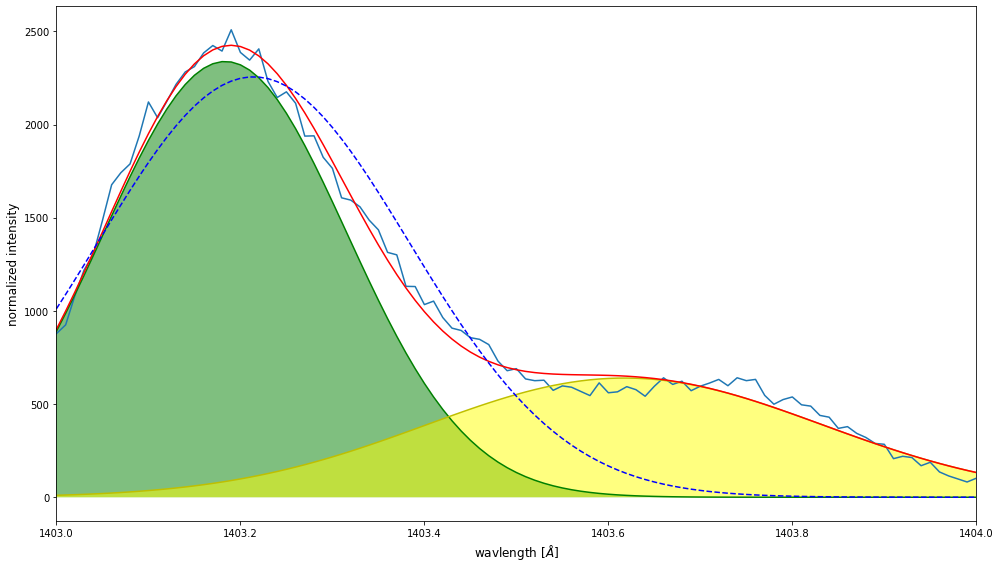

In [21]:
res = fit2gauss(wav,spec,error,verbose=True)

# extract arrays
y2a = res["y2a"]
y2b = res["y2b"]
y1g = res["y1g"]

#plot 
fig = plt.figure(figsize=(14,8))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])
# spectra
ax1.plot(wav, spec)
# peak 1
ax1.plot(wav, y2a, "g")
ax1.fill_between(wav, y2a.min(), y2a, facecolor="green", alpha=0.5)
# peak 2
ax1.plot(wav, y2b, "y")
ax1.fill_between(wav, y2b.min(), y2b, facecolor="yellow", alpha=0.5) 
#both
ax1.plot(wav,y2a+y2b, "r")
# single fit
ax1.plot(wav,y1g,'b--')

plt.xlim(1403,1404)
ax1.set_xlabel("wavlength [$\AA$]",  fontsize=12)
ax1.set_ylabel("normalized intensity",  fontsize=12)
fig.tight_layout()

In [22]:
a1g = res["a1g"]
a2g = res["a2g"]

line = 1402.77
l1 = a2g[1]
l2 = a2g[4]
v1 = (l1-line)/line*3e5
v2 = (l2-line)/line*3e5


print('red velocity = ',v1,'-----', '"blue" velocity = ', v2)

red velocity =  88.44123960556587 ----- "blue" velocity =  181.2512101656966


In [23]:
# single Gaussian
l1 = a1g[1]
v1 = (l1-line)/line*3e5
print('red velocity = ',v1)

red velocity =  95.01352855203095


In [24]:
N = len(tube.tarr) # length of tarr in time steps 
print(N)

501


In [44]:
v_r = np.zeros(N)
v_b = np.zeros(N)
w_r = np.zeros(N)
w_b = np.zeros(N)

for i in range(100,N):
    while True:
            try:
                wav,spec,error = create_spec(tube,frac,log10T,log10G,time=i)

                res = fit2gauss(wav,spec,error)
                a2g = res["a2g"] # extract fit parameters

                #calculate Doppler velocities
                line = 1403.
                c = 300.
                freq = c/line*1e3
                
                if a2g[1] < a2g[4]:
                    v_b[i] = (a2g[1]-line)/line*3e5 # in km/s
                    v_r[i] = (a2g[4]-line)/line*3e5
                    
                    w_b[i] = a2g[2]*freq
                    w_r[i] = a2g[5]*freq
                
                else:
                    v_r[i] = (a2g[1]-line)/line*3e5 # in km/s
                    v_b[i] = (a2g[4]-line)/line*3e5
                    
                    w_r[i] = a2g[2]*freq
                    w_b[i] = a2g[5]*freq
                
                
                break

            except RuntimeError:
                print("shit!")
                print('i = ',i)
                continue
    
    

shit!
i =  102


In [67]:
vr = v_r[150:]
vb = v_b[150:]
wr = w_r[150:]
wb = w_b[150:]

In [68]:
time = np.arange(15,50.1,0.1)

(0, 140)

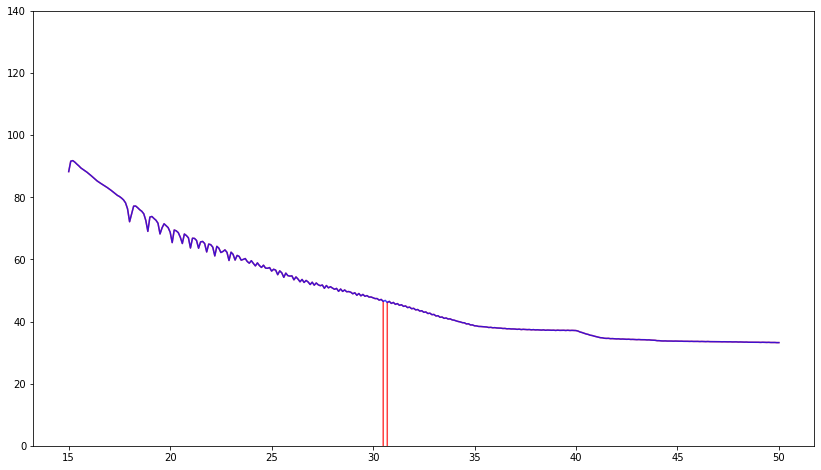

In [69]:
plt.figure(figsize=(14,8))
plt.plot(time,vr,'r',alpha=0.75)
plt.plot(time,vb,'b',alpha=0.75)
plt.ylim(0,140)

(0, 45)

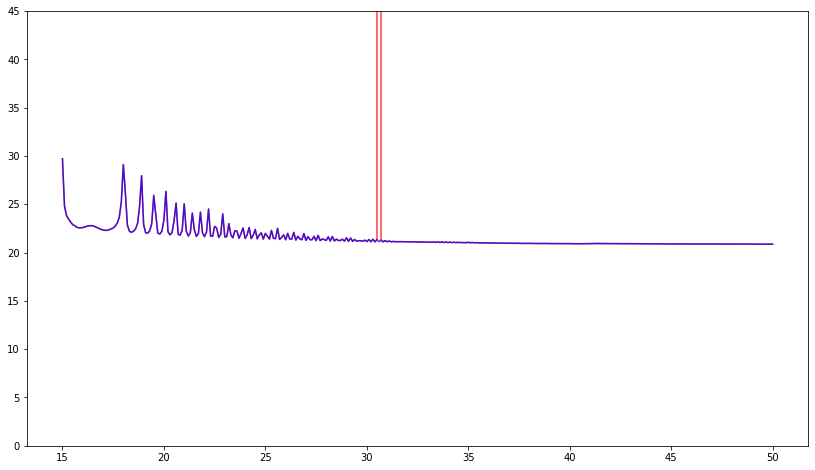

In [70]:
plt.figure(figsize=(14,8))
plt.plot(time,wr,'r',alpha=0.75)
plt.plot(time,wb,'b',alpha=0.75)
plt.ylim(0,45)

In [82]:
vr1 = vr[vr>0]
vb1 = vb[vb>0]
wr1 = wr[wr<1e5]
wb1 = wb[wb<1e5]

y=0.050613x+(19.089853)


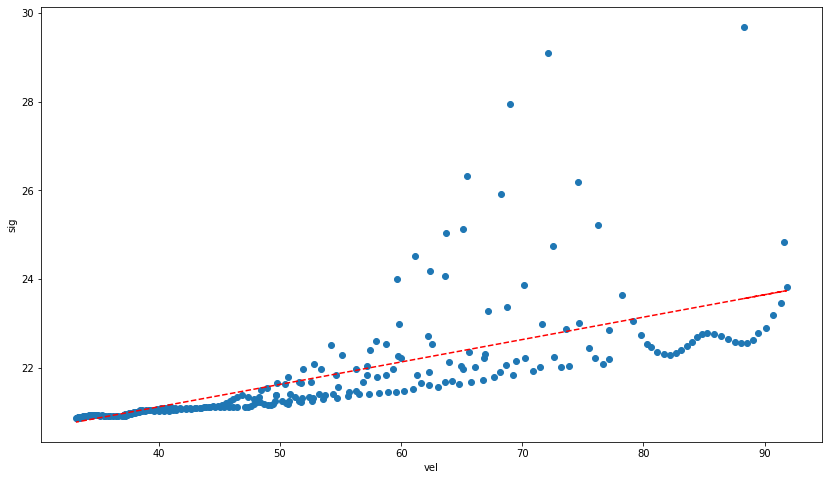

In [90]:
plt.figure(figsize=(14,8))
plt.plot(vr1,wr1,'o')
plt.xlabel('vel')
plt.ylabel('sig')

# calc the trendline
z = np.polyfit(vr1, wr1, 1)
p = np.poly1d(z)
plt.plot(vr1,p(vr1),"r--")
# the line equation:
print ("y=%.6fx+(%.6f)"%(z[0],z[1]))